***Google Drive Connection ***

In [ ]:
from google.colab import drive
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Unzipping Dataset**

In [ ]:
# zip_path = '/content/drive/MyDrive/Facial-Emotion-andBody-Language/Datasets/FE-Balanced-Data.zip'

# extract_to = os.path.dirname(zip_path)

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print('Files extracted successfully.')

In [ ]:
# posture_data_path = '/content/drive/MyDrive/Facial-Emotion-andBody-Language/Datasets/Master-Dataset-Body.zip'

# import zipfile
# with zipfile.ZipFile(posture_data_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Facial-Emotion-andBody-Language/Datasets/Master-Dataset-Body')


Data Loading

In [ ]:
emotion_data_path = '/content/drive/MyDrive/Facial-Emotion-andBody-Language/Datasets/FINAL-NewbalancedFE'
posture_data_path = '/content/drive/MyDrive/Facial-Emotion-andBody-Language/Datasets/Master-Dataset-Body/Master-Dataset'

Step 1: Data Preparation on Google Colab

Preprocessing the Data
Next, we need to load the images, convert them into arrays, and split them into training and testing sets.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os

img_size = (224, 224)
batch_size = 32

emotion_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

emotion_train_data = emotion_datagen.flow_from_directory(
    emotion_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

emotion_val_data = emotion_datagen.flow_from_directory(
    emotion_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 19461 images belonging to 7 classes.
Found 4864 images belonging to 7 classes.


In [ ]:
posture_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

posture_train_data = posture_datagen.flow_from_directory(
    posture_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

posture_val_data = posture_datagen.flow_from_directory(
    posture_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2344 images belonging to 3 classes.
Found 585 images belonging to 3 classes.


Step 2: Building the Baseline CNN Model
Now, let's create a simple CNN baseline model for the facial emotion dataset.

CNN Model for Facial Emotion Recognition

In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:

cnn_emotion_model = create_cnn_model(img_size + (3,), num_classes=emotion_train_data.num_classes)


In [ ]:
history = cnn_emotion_model.fit(
    emotion_train_data,
    epochs=10,
    validation_data=emotion_val_data
)

Epoch 1/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 5370s 9s/step - accuracy: 0.2105 - loss: 1.9501 - val_accuracy: 0.3612 - val_loss: 1.6710
Epoch 2/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 69s 112ms/step - accuracy: 0.3996 - loss: 1.5778 - val_accuracy: 0.4118 - val_loss: 1.5837
Epoch 3/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 67s 108ms/step - accuracy: 0.5189 - loss: 1.2887 - val_accuracy: 0.4387 - val_loss: 1.5497
Epoch 4/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 66s 107ms/step - accuracy: 0.6620 - loss: 0.9359 - val_accuracy: 0.4385 - val_loss: 1.7690
Epoch 5/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 65s 105ms/step - accuracy: 0.8024 - loss: 0.5656 - val_accuracy: 0.4328 - val_loss: 2.2333
Epoch 6/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 64s 104ms/step - accuracy: 0.8934 - loss: 0.3178 - val_accuracy: 0.4433 - val_loss: 2.8462
Epoch 7/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 66s 107ms/step - accuracy: 0.9331 - loss: 0.2076 - val_accuracy: 0.4338 - val_loss: 3.3697
Epoch 8/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 65s 106ms/step - accuracy: 0.9435 - loss: 0.

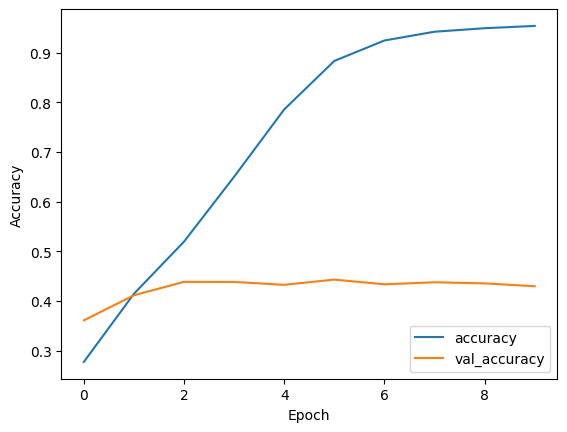

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

plot_accuracy(history)

In [ ]:
model_path = "/content/drive/MyDrive/Facial-Emotion-andBody-Language/Models/Emotion_CNN_model.h5"
cnn_emotion_model.save(model_path)

In [ ]:
from tensorflow.keras import regularizers

def create_improved_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
improved_cnn_emotion_model = create_improved_cnn_model(img_size + (3,), num_classes=emotion_train_data.num_classes)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
improved_history = improved_cnn_emotion_model.fit(
    emotion_train_data,
    epochs=20,
    validation_data=emotion_val_data,
    callbacks=[early_stopping]
)

In [ ]:
model_path = "/content/drive/MyDrive/Facial-Emotion-andBody-Language/Models/improved_Emotion_CNN_model.h5"
improved_cnn_emotion_model.save(model_path)

In [ ]:
emotion_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

emotion_train_data_aug = emotion_datagen_aug.flow_from_directory(
    emotion_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

emotion_val_data_aug = emotion_datagen_aug.flow_from_directory(
    emotion_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 19461 images belonging to 7 classes.
Found 4864 images belonging to 7 classes.


In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)



In [ ]:
aug_history = improved_cnn_emotion_model.fit(
    emotion_train_data_aug,
    epochs=30,
    validation_data=emotion_val_data_aug,
    callbacks=[early_stopping, lr_scheduler]
)

plot_training_history(aug_history)



val_loss_aug, val_accuracy_aug = improved_cnn_emotion_model.evaluate(emotion_val_data_aug)
print(f'Validation Accuracy after augmentation: {val_accuracy_aug:.4f}, Validation Loss: {val_loss_aug:.4f}')

y_pred_aug = improved_cnn_emotion_model.predict(emotion_val_data_aug)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
y_true_aug = emotion_val_data_aug.classes

print(classification_report(y_true_aug, y_pred_classes_aug, target_names=emotion_train_data_aug.class_indices.keys()))

Epoch 1/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 312s 469ms/step - accuracy: 0.1887 - loss: 2.1083 - val_accuracy: 0.2204 - val_loss: 2.0306 - learning_rate: 1.0000e-04
Epoch 2/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 314s 510ms/step - accuracy: 0.2138 - loss: 2.0383 - val_accuracy: 0.2424 - val_loss: 1.9896 - learning_rate: 1.0000e-04
Epoch 3/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 376s 611ms/step - accuracy: 0.2250 - loss: 2.0090 - val_accuracy: 0.2457 - val_loss: 1.9682 - learning_rate: 1.0000e-04
Epoch 4/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 387s 631ms/step - accuracy: 0.2343 - loss: 1.9885 - val_accuracy: 0.2574 - val_loss: 1.9590 - learning_rate: 1.0000e-04
Epoch 5/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 391s 636ms/step - accuracy: 0.2329 - loss: 1.9642 - val_accuracy: 0.2537 - val_loss: 1.9329 - learning_rate: 1.0000e-04


NameError: name 'plot_training_history' is not defined

In [ ]:

def plot_training_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

plot_training_history(improved_history)